In [10]:
from sklearn.cluster import KMeans #군집분석을 위한 라이브러리 import
import numpy as np
import pandas as pd                 #필요한 라이브러리 import
import matplotlib.pyplot as plt    #그래프 시각화를 위한 matplotlib import
import seaborn as sns              #그래프 시각화를 위한 seaborn import
#plt.style.use('seaborn')           #스타일 적용
#sns.set_palette("pastel")          #색을 파스텔 톤으로 적용

from matplotlib import font_manager, rc #한글 폰트를 사용하기 위한 라이브러리 import
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() #font_manager를통해 경로에 있는 malgun 폰트를 font_name에 저장
rc('font', family=font_name) #폰트 적용

import warnings
warnings.filterwarnings('ignore')            #경고무시

# 데이터 불러오기
df = pd.read_csv('C:\data\Gwangju_Gu_final.csv')   #csv파일을 데이터 프레임 형태로 가져온다.
#df.head() #가져온 데이터의 5열을 출력
print(df)

     구       인구밀도  1020인구     유동인구
0  광산구  133421.79   80220  2170000
1   북구  261526.58   83765  1840000
2   동구   83645.37   17551   592078
3   남구  198772.19   39208   808270
4   서구  226923.42   61002  1880000


In [3]:
df['구'].replace({'광산구':1, '북구':2 ,'동구':3, '남구':4,'서구':5}, inplace=True) #분석을위해 String형 데이터를 숫자로 바꿈

def change_n_clusters(n_clusters, data): #엘보우 분석
    sum_of_squared_distance = []         #빈 배열 생성
    for n_cluster in n_clusters:         #for문, 군집의 갯수 1,2,3,4일때가 각각 들어감
        kmeans = KMeans(n_clusters=n_cluster) #kemans에 k를 1,2,3,4로 넣어서 분석 실시
        kmeans.fit(df)
        sum_of_squared_distance.append(kmeans.inertia_)   #각 군집의 응집도를 나타낸 값들을 배열에 넣음
    plt.figure(1 , figsize = (12, 6))                     #도화지 생성
    plt.plot(n_clusters , sum_of_squared_distance , 'o')  #점 그래프 생성
    plt.plot(n_clusters , sum_of_squared_distance , '--' , alpha = 0.5) #선그래프 생성
    plt.xlabel('Number of Clusters') #X축 제목
    plt.ylabel('Inertia') #Y축 제목
    plt.show #보여주기
    print(sum_of_squared_distance)


[2026715019936.9453, 104181370085.18506, 31888862028.649, 1657766429.9927993]


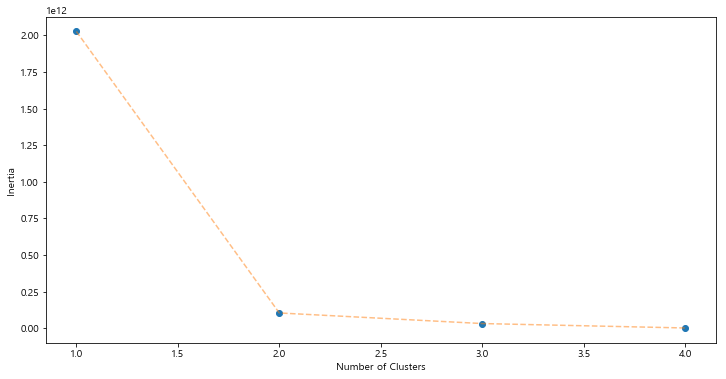

In [4]:
n_clusters = [1,2,3,4] #군집의 개수를 1~4개로 정하고 엘보우 분석을 실시
change_n_clusters(n_clusters, df) #생성했던 엘보우 분석을 위한 함수 호출

In [5]:
kmeans = KMeans(n_clusters=2) #엘보우 분석결과 k=2일때 적당함을 인지하고
kmeans.fit(df) #군집의 갯수를 2개로 하고 df데이터를 군집분석 실시

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
df['구'].replace({1:'광산구',2:'북구' ,3:'동구', 4:'남구',5:'서구'}, inplace=True) #추후 각 포인트에대한 라벨링을 위하여 다시 정수형 값을 원래의 이름으로 되돌림
df.head()  #잘 들어가 있다.

,구,인구밀도,1020인구,유동인구
0,광산구,133421.79,80220,2170000
1,북구,261526.58,83765,1840000
2,동구,83645.37,17551,592078
3,남구,198772.19,39208,808270
4,서구,226923.42,61002,1880000


[['광산구' 133421.79 80220 2170000]
 ['북구' 261526.58 83765 1840000]
 ['동구' 83645.37 17551 592078]
 ['남구' 198772.19 39208 808270]
 ['서구' 226923.42 61002 1880000]]
80220
83765


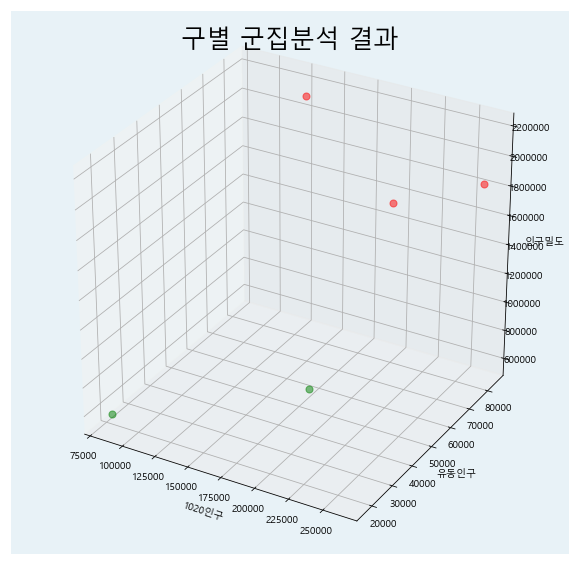

In [7]:
# https://frhyme.github.io/python-lib/matplotlib_3dplotting/
from mpl_toolkits.mplot3d import Axes3D # 3D 그래프를 그리기 위한 패키지

fig = plt.figure(figsize=(10, 10)) # 그리기 위한 판? 도화지? 생성
ax = fig.add_subplot(111, projection='3d')

# x, y, z축이 각각 어떤 값을 나타내는지 label 생성---------------------
x = df['1020인구']
y = df['유동인구']
z = df['인구밀도']

ax.set_xlabel('1020인구')
ax.set_ylabel('유동인구')
ax.set_zlabel('인구밀도')
#----------------------------------------------------------------------

# 1020인구, 유동인구, 인구밀도가 각각 x, y, z 좌표이므로 해당 컬럼만 추출------------
tmp_list = df.iloc[:, [0, 1, 2, 3]].values
print(tmp_list)
print(tmp_list[0][2])
print(tmp_list[1][2])
# print로 찍어보면 dataframe 기준 0,2번째, 1,2번째에 있음을 확인 가능 (테스트용)----------

# kmeans.labels는 0,0,1,1,0으로 이루어짐
# 0은 0끼리 군집이고, 1은 1끼리 군집이다
tmp_colorlabel = []
for i in range(len(kmeans.labels_)):
    tmp_colorlabel.append(kmeans.labels_[i])
# 기존 kmeans.labels를 list로 만들어 보다 효율적으로 작동하게 한다 -------------------------

colors = np.array(["green", "red"]) # 군집별 색깔 설정
ax.set_facecolor('#E8F2F7')
plt.title('구별 군집분석 결과',size=25)
for i in range(len(tmp_list)): # 좌표찍기, 여기서는 i가 5
    # 좌표를 팔레트에 찍는 코드 / x, y, z값을 각각 가져오고, tmp_colorlabel에 저장한 kmeans.labels_의 순서대로 광산구, 북구, 동구, 남구, 서구를 색칠한다
    # c는 색깔, s는 마커 사이즈, alpha는 투명도
    ax.scatter(tmp_list[i,1],tmp_list[i,2],tmp_list[i,3], c = colors[tmp_colorlabel[i]], s=50, alpha=0.5)
    # 좌표에 광산구, 서구, 북구 등의 label을 다는 코드 / tmp_list의 0번째 컬럼을 string으로 변환하고 달아준다. size는 라벨사이즈, color는 색
    #ax.text(tmp_list[i,1],tmp_list[i,2],tmp_list[i,3],  '%s' % (str(tmp_list[i,0])), size=20, color='k') 